In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

# Austin 311 Data
Updated: May 9, 2020<br>
Data collected from CSR production system.<br>
Data begins 01/03/2014 and is refreshed daily at 4:00am.<br>


# I. Acquire data set from the city of Austin:
<a href='https://data.austintexas.gov/Utilities-and-City-Services/Austin-311-Public-Data/xwdj-i9he'>Data.AustinTexas.gov: Austin 311 Public Data </a>

In [2]:
df = pd.read_csv('Austin_311_Public_Data.csv')
df

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Service Request (SR) Number                       SR Description  \
0                      20-00094853   Austin Code - Request Code Officer   
1                      19-00422824                Injured / Sick Animal   
2                      19-00422828  Animal Control - Assistance Request   
3                      18-00407565  Animal Control - Assistance Request   
4                      19-00308199                   Obstruction in ROW   
...                            ...                                  ...   
909132                 19-00373555                Loud Commercial Music   
909133                 19-00373540          Street Light Issue- Address   
909134                 19-00373548         Traffic Signal - Maintenance   
909135                 19-00373518                     Debris in Street   
909136                 19-00373507                 ARR Missed Recycling   

          Method Received SR Status      Status Change Date  \
0                   Phone    Closed  03/14/2020 09:17:50 AM   
1                   Phone    Closed  11/03/2019 02:10:35 PM   
2                   Phone    Closed  11/03/2019 02:40:35 PM   
3                   Phone    Closed  12/21/2019 10:56:38 AM   
4                   Phone  Resolved  12/17/2019 11:02:41 AM   
...                   ...       ...                     ...   
909132  Spot311 Interface    Closed  09/29/2019 06:06:48 PM   
909133              Phone    Closed  09/30/2019 12:20:43 PM   
909134              Phone    Closed  10/01/2019 09:39:03 AM   
909135              Phone    Closed  03/28/2020 01:02:29 AM   
909136              Phone    Closed  10/03/2019 08:37:17 AM   

                  Created Date        Last Update Date  \
0       03/14/2020 09:05:49 AM  03/24/2020 09:17:21 AM   
1       11/03/2019 01:54:07 PM  11/03/2019 02:10:35 PM   
2       11/03/2019 01:59:18 PM  11/03/2019 02:40:35 PM   
3       11/29/2018 12:48:09 PM  12/21/2019 10:56:38 AM   
4       08/13/2019 10:24:30 AM  12/17/2019 11:02:40 AM   
...                        ...                     ...   
909132  09/28/2019 10:30:13 PM  09/29/2019 06:06:47 PM   
909133  09/28/2019 10:19:17 PM  09/30/2019 12:20:42 PM   
909134  09/28/2019 10:27:07 PM  10/01/2019 09:39:03 AM   
909135  09/28/2019 09:46:47 PM  03/28/2020 01:02:29 AM   
909136  09/28/2019 09:26:40 PM  10/03/2019 08:37:17 AM   

                    Close Date  \
0       03/14/2020 09:17:50 AM   
1       11/03/2019 02:10:35 PM   
2       11/03/2019 02:40:35 PM   
3       12/21/2019 10:56:38 AM   
4       12/17/2019 11:02:41 AM   
...                        ...   
909132  09/29/2019 06:06:48 PM   
909133  09/30/2019 12:20:43 PM   
909134  10/01/2019 09:39:03 AM   
909135  03/28/2020 01:02:29 AM   
909136  10/03/2019 08:37:17 AM   

                                            SR Location Street Number  ...  \
0        739 W WILLIAM CANNON DR 2065, AUSTIN, TX 78745           739  ...   
1       NORTHLAND DR & N MOPAC EXPY SVRD SB, AUSTIN, TX           NaN  ...   
2                   811 HUNTINGDON PL, AUSTIN, TX 78745           811  ...   
3                  1520 RUTHERFORD LN, AUSTIN, TX 78754          1520  ...   
4                  1722 W ANDERSON LN, AUSTIN, TX 78757          1722  ...   
...                                                 ...           ...  ...   
909132                   710 W 6TH ST, AUSTIN, TX 78701           710  ...   
909133                3109 BESSIE AVE, AUSTIN, TX 78617          3109  ...   
909134   W BRAKER LN & N MOPAC EXPY SVRD SB, AUSTIN, TX           NaN  ...   
909135                   200 W 6TH ST, AUSTIN, TX 78701           200  ...   
909136                 1510 W 24TH ST, AUSTIN, TX 78703          1510  ...   

       Zip Code  County  State Plane X Coordinate State Plane Y Coordinate  \
0       78745.0  TRAVIS              3.100039e+06             1.004472e+07   
1       78731.0  TRAVIS              3.109582e+06             1.009564e+07   
2       78745.0  TRAVIS              3.099276e+06             1.004432e+

# II. Inspect the data types of each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909137 entries, 0 to 909136
Data columns (total 22 columns):
Service Request (SR) Number    909137 non-null object
SR Description                 909137 non-null object
Method Received                909137 non-null object
SR Status                      909137 non-null object
Status Change Date             909137 non-null object
Created Date                   909137 non-null object
Last Update Date               909137 non-null object
Close Date                     904944 non-null object
SR Location                    902889 non-null object
Street Number                  726514 non-null object
Street Name                    902857 non-null object
City                           899400 non-null object
Zip Code                       899262 non-null float64
County                         894108 non-null object
State Plane X Coordinate       902889 non-null float64
State Plane Y Coordinate       902889 non-null float64
Latitude Coordinate   

# III. Grab the columns of interest and edit the header labels

In [4]:
df = df.loc[:,[
    'Service Request (SR) Number',
    'SR Description',
    'Method Received',
    'SR Status',
    'Created Date',
    'Close Date',
    'Zip Code',
    'Latitude Coordinate',
    'Longitude Coordinate',
    'Council District'
    ]]
df.rename(columns = {'Service Request (SR) Number':'ServiceRequestNumber',
                     'SR Description':'Description',
                     'Method Received':'MethodReceived',
                     'SR Status':'Status',
                     'Created Date':'Created',
                     'Close Date':'Closed',
                     'Zip Code':'ZipCode',
                     'Latitude Coordinate':'Lat',
                     'Longitude Coordinate':'Long',
                     'Council District':'District'
                      },inplace = True)
df

ServiceRequestNumber                          Description  \
0               20-00094853   Austin Code - Request Code Officer   
1               19-00422824                Injured / Sick Animal   
2               19-00422828  Animal Control - Assistance Request   
3               18-00407565  Animal Control - Assistance Request   
4               19-00308199                   Obstruction in ROW   
...                     ...                                  ...   
909132          19-00373555                Loud Commercial Music   
909133          19-00373540          Street Light Issue- Address   
909134          19-00373548         Traffic Signal - Maintenance   
909135          19-00373518                     Debris in Street   
909136          19-00373507                 ARR Missed Recycling   

           MethodReceived    Status                 Created  \
0                   Phone    Closed  03/14/2020 09:05:49 AM   
1                   Phone    Closed  11/03/2019 01:54:07 PM   
2                   Phone    Closed  11/03/2019 01:59:18 PM   
3                   Phone    Closed  11/29/2018 12:48:09 PM   
4                   Phone  Resolved  08/13/2019 10:24:30 AM   
...                   ...       ...                     ...   
909132  Spot311 Interface    Closed  09/28/2019 10:30:13 PM   
909133              Phone    Closed  09/28/2019 10:19:17 PM   
909134              Phone    Closed  09/28/2019 10:27:07 PM   
909135              Phone    Closed  09/28/2019 09:46:47 PM   
909136              Phone    Closed  09/28/2019 09:26:40 PM   

                        Closed  ZipCode        Lat       Long  District  
0       03/14/2020 09:17:50 AM  78745.0  30.197409 -97.789895       2.0  
1       11/03/2019 02:10:35 PM  78731.0  30.336784 -97.755961      10.0  
2       11/03/2019 02:40:35 PM  78745.0  30.196355 -97.792338       2.0  
3       12/21/2019 10:56:38 AM  78754.0  30.337863 -97.680980       1.0  
4       12/17/2019 11:02:41 AM  78757.0  30.353154 -97.724167       7.0  
...                        ...      ...        ...        ...       ...  
909132  09/29/2019 06:06:48 PM  78701.0  30.270255 -97.750056       9.0  
909133  09/30/2019 12:20:43 PM  78617.0  30.203380 -97.636893       2.0  
909134  10/01/2019 09:39:03 AM  78759.0  30.396101 -97.733400       7.0  
909135  03/28/2020 01:02:29 AM  78701.0  30.268730 -97.744352       9.0  
909136  10/03/2019 08:37:17 AM  78703.0  30.289610 -97.754629       9.0  

[909137 rows x 10 columns]

# IV. Check for entries without location data and remove.

In [5]:
df.dropna(subset = ['Lat','Long'], inplace = True)

# V. Convert "Created" and "Closed" columns to date time format and sort.

In [6]:
df['Created'] = pd.to_datetime(df['Created'])
df['Closed'] = pd.to_datetime(df['Closed'])

df.sort_values('Created', ascending = False)

ServiceRequestNumber                          Description  \
67426           20-00183289                Injured / Sick Animal   
67424           20-00183288        Parking Violation Enforcement   
67429           20-00183287        Parking Violation Enforcement   
67428           20-00183285                 Loose Animal Not Dog   
67427           20-00183283         Traffic Signal - Maintenance   
...                     ...                                  ...   
549958          14-00000294         Traffic Signal - Maintenance   
475898          14-00000268                    Coyote Complaints   
469491          14-00000261      Sign - Traffic Sign Maintenance   
472918          14-00000230   Lost Item in Storm Drainage System   
473284          14-00000197  Dangerous/Vicious Dog Investigation   

           MethodReceived  Status             Created              Closed  \
67426               Phone    Open 2020-05-09 18:59:55                 NaT   
67424   Spot311 Interface     New 2020-05-09 18:57:09                 NaT   
67429   Spot311 Interface     New 2020-05-09 18:57:06                 NaT   
67428               Phone    Open 2020-05-09 18:53:20                 NaT   
67427               Phone    Open 2020-05-09 18:49:34                 NaT   
...                   ...     ...                 ...                 ...   
549958              Phone  Closed 2014-01-01 07:02:20 2014-07-23 13:06:48   
475898              Phone  Closed 2014-01-01 04:54:56 2014-01-05 07:43:52   
469491              Phone  Closed 2014-01-01 04:25:34 2014-01-03 06:57:22   
472918              Phone  Closed 2014-01-01 03:02:45 2014-01-03 07:40:49   
473284              Phone  Closed 2014-01-01 01:45:50 2014-01-04 12:18:52   

        ZipCode        Lat       Long  District  
67426   78702.0  30.270681 -97.714203       1.0  
67424   78741.0  30.244512 -97.723473       3.0  
67429   78741.0  30.242510 -97.718205       3.0  
67428   78723.0  30.285913 -97.698429       1.0  
67427   78741.0  30.232382 -97.720413       3.0  
...         ...        ...        ...       ...  
549958  78723.0  30.308985 -97.669068       NaN  
475898  78735.0  30.249437 -97.893208       NaN  
469491  78758.0  30.375255 -97.704668       NaN  
472918  78701.0  30.268716 -97.745208       NaN  
473284  78731.0  30.348447 -97.777768       NaN  

[902889 rows x 10 columns]

# VI. Filter out all entries prior to 5/1/2020


In [7]:
filt = df['Created'] >= '2020-05-01'
df = df[filt].sort_values('Created', ascending = False)
df

ServiceRequestNumber                         Description  \
67426           20-00183289               Injured / Sick Animal   
67424           20-00183288       Parking Violation Enforcement   
67429           20-00183287       Parking Violation Enforcement   
67428           20-00183285                Loose Animal Not Dog   
67427           20-00183283        Traffic Signal - Maintenance   
...                     ...                                 ...   
99402           20-00170487  Austin Code - Request Code Officer   
102162          20-00170485  Austin Code - Request Code Officer   
89303           20-00170473   Traffic Signal - Dig Tess Request   
102161          20-00170464  Austin Code - Request Code Officer   
89302           20-00170463                Guardrail New/Repair   

           MethodReceived            Status             Created  \
67426               Phone              Open 2020-05-09 18:59:55   
67424   Spot311 Interface               New 2020-05-09 18:57:09   
67429   Spot311 Interface               New 2020-05-09 18:57:06   
67428               Phone              Open 2020-05-09 18:53:20   
67427               Phone              Open 2020-05-09 18:49:34   
...                   ...               ...                 ...   
99402               Phone            Closed 2020-05-01 02:04:53   
102162              Phone            Closed 2020-05-01 01:56:00   
89303               Phone  Work In Progress 2020-05-01 00:53:42   
102161              Phone            Closed 2020-05-01 00:28:57   
89302               Phone          Resolved 2020-05-01 00:27:54   

                    Closed  ZipCode        Lat       Long  District  
67426                  NaT  78702.0  30.270681 -97.714203       1.0  
67424                  NaT  78741.0  30.244512 -97.723473       3.0  
67429                  NaT  78741.0  30.242510 -97.718205       3.0  
67428                  NaT  78723.0  30.285913 -97.698429       1.0  
67427                  NaT  78741.0  30.232382 -97.720413       3.0  
...                    ...      ...        ...        ...       ...  
99402  2020-05-01 09:34:57  78752.0  30.328400 -97.691253       4.0  
102162 2020-05-01 09:34:26  78752.0  30.328400 -97.691253       4.0  
89303                  NaT  78701.0  30.269962 -97.745939       9.0  
102161 2020-05-01 09:34:24  78752.0  30.328400 -97.691253       4.0  
89302  2020-05-01 01:42:54  78759.0  30.396101 -97.733400       7.0  

[3622 rows x 10 columns]

# VII. Generate map and add distilled Austin 311 data points.
Each marker displays a description of the service request when clicked.

In [8]:
austin_map = folium.Map([30.2672, -97.7431], zoom_start = 13)

places = folium.map.FeatureGroup()

for Description,x,y in zip(df.Description,df.Lat,df.Long):
    places.add_child(
    folium.CircleMarker([x, y], radius = 2, color = 'blue', fill = True, fill_color = 'blue', popup = Description)
    )
austin_map.add_child(places)


# VIII. Analysis

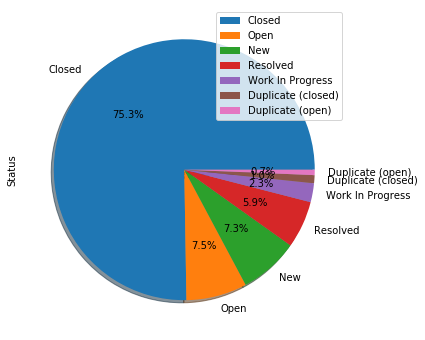

In [9]:
df['Status'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize = (15,6), shadow = True)
plt.legend(loc='upper right')


Figure 1: Status percentages

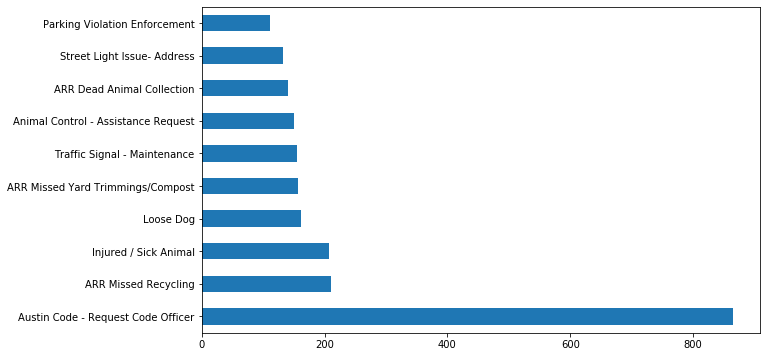

In [10]:
dfDescTop = df['Description'].value_counts().head(10)

dfDescTop.plot(kind='barh',figsize = (10,6))

Figure 2: Top 10 most common service requests